# Multi-Cycle and Parameters

In this notebook, we cover the ability to simulation over a larger range of conditions inclusive of multi-cycling via the 'experimental' function call. First, we install and import PyBaMM.

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

An experimental defines conditional progression of the battery, and is covers common protocols like a CC-CV operation. In the following definition, a cycle is defined by a tuple of operating instructions. In this case, the experiment consists of a cycle of constant current C/10 discharge, a one hour rest, a constant current (1 A) constant voltage (4.2 V) and another one hour rest, all of it repeated three times (notice the * 3).

In [2]:
experiment = pybamm.Experiment(
    [
        ("Discharge at C/10 for 10 hours or until 3.0 V",
        "Rest for 1 hour",
        "Charge at 1 A until 4.1 V",
        "Hold at 4.1 V until 50 mA",
        "Rest for 1 hour"),
    ] * 3
)


Next, we re-introduce the DFN model,

In [52]:
model = pybamm.lithium_ion.SPM()

and create our simulation, passing our experiment using a keyword argument

In [4]:
sim = pybamm.Simulation(model, experiment=experiment)

We then solve and plot the solution

interactive(children=(FloatSlider(value=0.0, description='t', max=38.90909528451408, step=0.3890909528451408),…

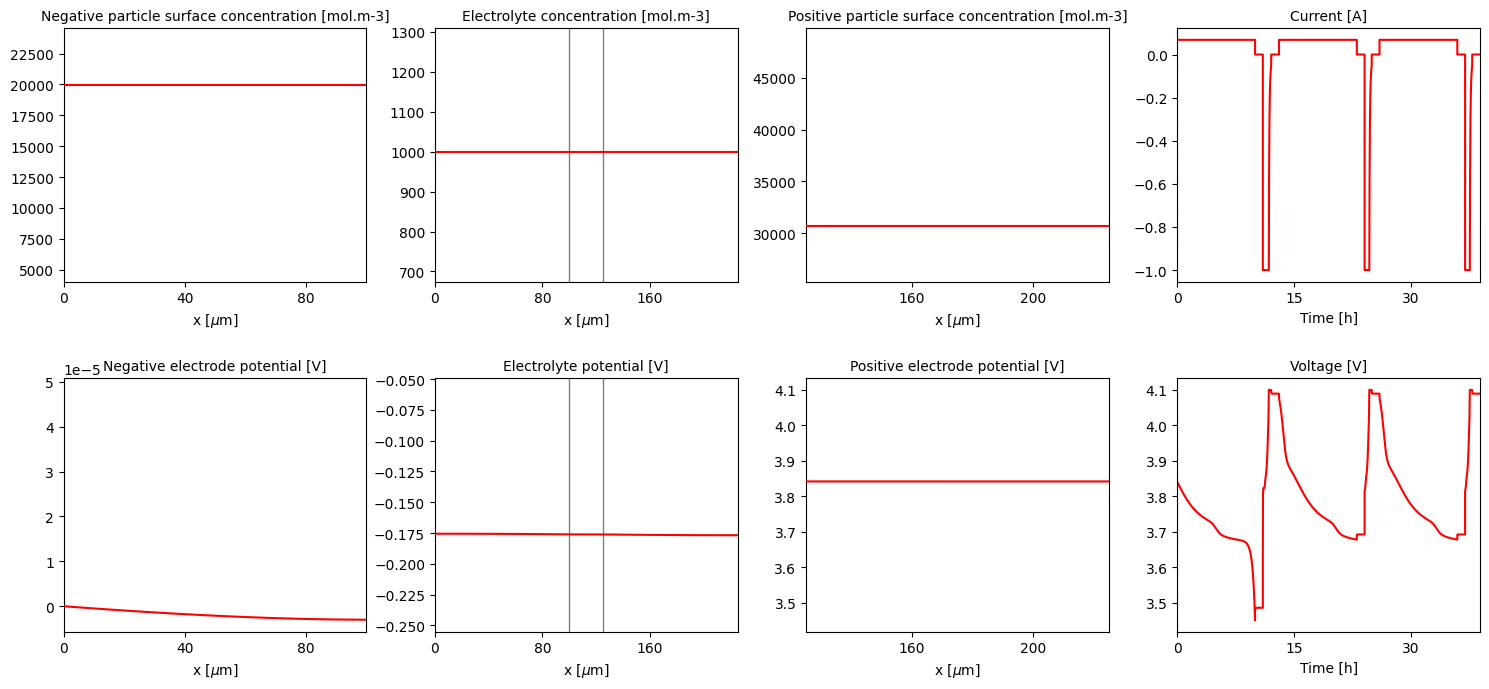

In [5]:
sim.solve()
sim.plot()

As we have seen, experiments allow us to define complex simulations using a very simple syntax. The instructions can be of the form "(Dis)charge at x A/C/W", "Rest", or "Hold at x V". The running time should be a time in seconds, minutes or hours, e.g. "10 seconds", "3 minutes" or "1 hour". The stopping conditions should be a circuit state, e.g. "1 A", "C/50" or "3 V".

Some examples of experiment instructions are:
```python
    "Discharge at 1C for 0.5 hours",
    "Discharge at C/20 for 0.5 hours",
    "Charge at 0.5 C for 45 minutes",
    "Discharge at 1 A for 90 seconds",
    "Charge at 200mA for 45 minutes (1 minute period)",
    "Discharge at 1 W for 0.5 hours",
    "Charge at 200 mW for 45 minutes",
    "Rest for 10 minutes (5 minute period)",
    "Hold at 1 V for 20 seconds",
    "Charge at 1 C until 4.1V",
    "Hold at 4.1 V until 50 mA",
    "Hold at 3V until C/50",
```

Optionally, each instruction can contain at the end the expression "(x minute period)" in which the period at which to record the simulation outputs during that instruction. To change the period for the whole experiment we can pass it as a keyword argument in the experiment.

Additionally, we can use the operators `+` and `*` on lists in order to combine and repeat cycles:

In [6]:
[("Discharge at 1C for 0.5 hours", "Discharge at C/20 for 0.5 hours")] * 3 + [("Charge at 0.5 C for 45 minutes",)]

[('Discharge at 1C for 0.5 hours', 'Discharge at C/20 for 0.5 hours'),
 ('Discharge at 1C for 0.5 hours', 'Discharge at C/20 for 0.5 hours'),
 ('Discharge at 1C for 0.5 hours', 'Discharge at C/20 for 0.5 hours'),
 ('Charge at 0.5 C for 45 minutes',)]

# Modifying parameter values

Previously, we've ran all of our models with the default parameter values; However, PyBaMM also allows you to tweak these settings for your application. In this tutorial, we will see how to change the parameters in PyBaMM. They can be viewed as,

In [7]:
model.default_parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.4,
 'Cell cooling surface area [m2]': 0.0569,
 'Cell volume [m3]': 7.8e-06,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 0.680616,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Edge heat transfer coefficient [W.m-2.K-1]': 0.3,
 'Electrode height [m]': 0.137,
 'Electrode width [m]': 0.207,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Capiglia1999 at 0x7ce8457d0e50>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Capiglia1999 at 0x7ce8457d0ee0>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 19986.609595075,
 'In

Note, the default parameter set is "Marquis2019".

## Changing the parameter set

PyBaMM has a number of in-built parameter sets (check the list [here](https://pybamm.readthedocs.io/en/latest/source/api/parameters/parameter_sets.html)), which can be selected via,

In [8]:
parameter_values = pybamm.ParameterValues("Chen2020")

Likewise to above, we can display the parameters and corresponding values stored in the dictionary,

In [9]:
parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x7ce83b3339a0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x7ce83b333910>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial conce

or we can search for a particular parameter

In [10]:
parameter_values.search("electrolyte")

EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x7ce83b3339a0>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x7ce83b333910>
Initial concentration in electrolyte [mol.m-3]	1000.0
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Positive electrode Bruggeman coefficient (electrolyte)	1.5
Separator Bruggeman coefficient (electrolyte)	1.5


To run a simulation with this parameter set, we can proceed as usual but passing the parameters as a keyword argument

interactive(children=(FloatSlider(value=0.0, description='t', max=52.6929193215113, step=0.526929193215113), O…

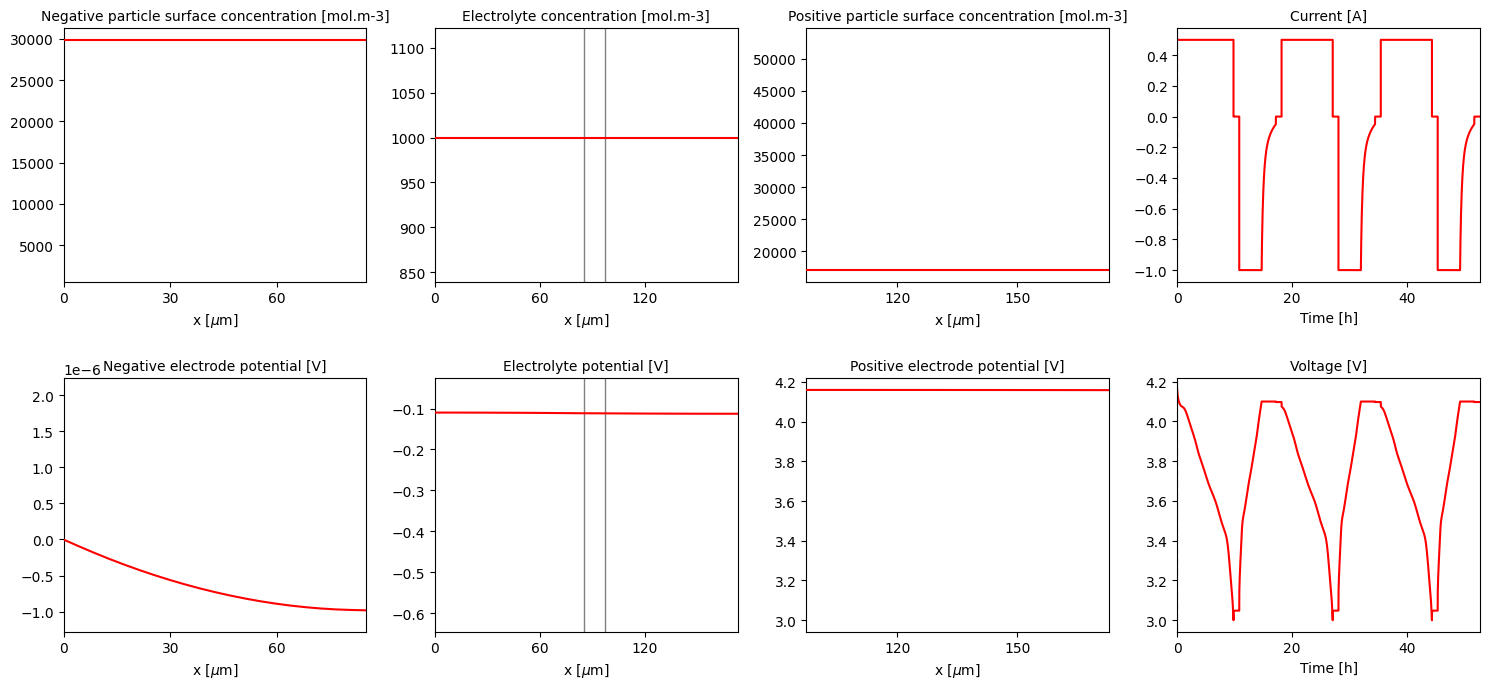

In [11]:
sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
sim.solve()
sim.plot()

More details on each subset can be found [here](https://github.com/pybamm-team/PyBaMM/tree/develop/pybamm/input/parameters).

## Change individual parameters

We often want to quickly change a small number of parameter values to investigate how the behaviour or the battery changes. In such cases, we can change parameter values without having to leave the notebook or script you are working in.

We will modify the contact resistance variable to 10 mOhm,

In [12]:
parameter_values["Contact resistance [Ohm]"] = 0.01

Now we just need to run the simulation with the new parameter values

interactive(children=(FloatSlider(value=0.0, description='t', max=52.69291932219833, step=0.5269291932219833),…

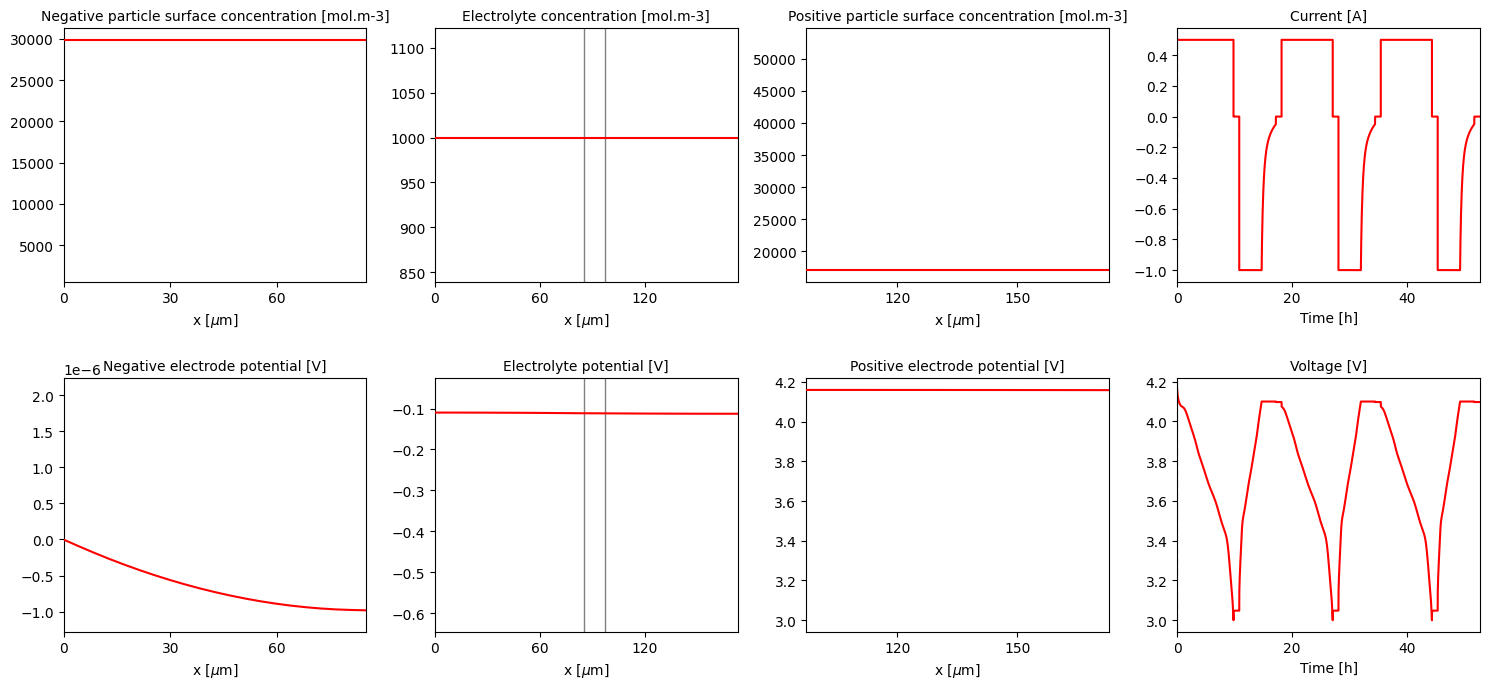

In [13]:
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot()

Next, let's try modifying the electrode OCP's from experimental data. The first step is to download the data,

In [14]:
%%bash

curl -o OCV_Graphite.parquet https://raw.githubusercontent.com/BradyPlanden/IntelLiGent-Modelling-Workshop/main/Day1/data/OCV_Graphite.parquet
curl -o LNMO_theta_OCV_singleSweep.parquet https://raw.githubusercontent.com/BradyPlanden/IntelLiGent-Modelling-Workshop/main/Day1/data/LNMO_theta_OCV_singleSweep.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1746  100  1746    0     0  11350      0 --:--:-- --:--:-- --:--:-- 11411
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2401  100  2401    0     0  13438      0 --:--:-- --:--:-- --:--:-- 13488


We then define variables from the experimental data using the pandas package with pyarrow for the parquet format,

In [41]:
ocp_neg = pd.read_parquet("/content/OCV_Graphite.parquet", engine="pyarrow")
ocp_pos = pd.read_parquet("/content/LNMO_theta_OCV_singleSweep.parquet", engine="pyarrow")

ocp_pos.OCV = ocp_pos.OCV.values[::-1]

We need to define python functions for the forward model to use, this is completed with the PyBaMM interpolant functionality,

In [46]:
def graphite_OCP(theta):
    return pybamm.Interpolant(np.array(ocp_neg.theta),np.array(ocp_neg.OCV),theta)

def lnmo_OCP(theta):
    return pybamm.Interpolant(np.array(ocp_pos.theta),np.array(ocp_pos.OCV),theta, extrapolate=False)

Next, let's update the default parameters for the new OCP's,

In [47]:
parameter_values.update(
    {"Positive electrode OCP [V]":lnmo_OCP,
    "Negative electrode OCP [V]": graphite_OCP,
    "Upper voltage cut-off [V]": 5.0,
    "Maximum concentration in negative electrode [mol.m-3]": 31370
    }
)

Let's update the experiment class,

In [54]:
experiment = pybamm.Experiment(
    [
        ("Discharge at C/10 for 10 hours or until 3.8 V",
        "Rest for 1 hour",
        "Charge at 1 A until 4.6 V",
        "Hold at 4.6 V until 50 mA",
        "Rest for 1 hour"),
    ] * 3
)

Reconstructing the simulation class, solving it, and plotting,

interactive(children=(FloatSlider(value=0.0, description='t', max=38.6428997410407, step=0.386428997410407), O…

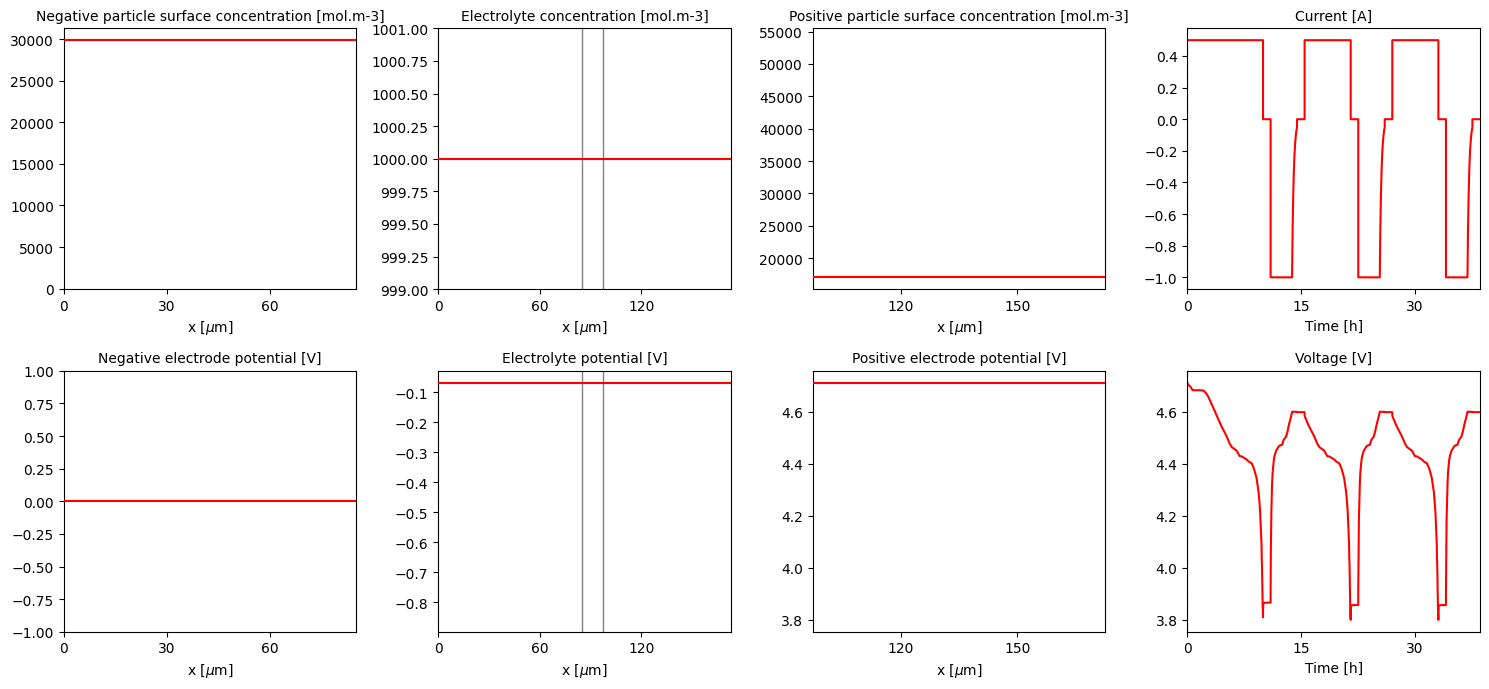

In [55]:
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
sim.solve()
sim.plot()

# Simulating a  Drive-Cycle

We start by importing the drive-cycle in csv format,

In [56]:
%%bash

curl -o WLTP_M50_M3.csv https://raw.githubusercontent.com/BradyPlanden/IntelLiGent-Modelling-Workshop/main/Day1/data/WLTP_M50_M3.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128k  100  128k    0     0   554k      0 --:--:-- --:--:-- --:--:--  552k


You can then implement drive cycles importing the dataset and creating an interpolant to pass as the current function.

In [57]:
parameter_values = pybamm.ParameterValues("Chen2020")
drive_cycle_power = pd.read_csv("/content/WLTP_M50_M3.csv", comment="#", header=None).to_numpy()

We can then include the previous experiment definition as,

In [58]:
# Create interpolant
power_interpolant = pybamm.Interpolant(drive_cycle_power[:, 0], drive_cycle_power[:, 1], pybamm.t)

# Set drive cycle power function
parameter_values.update({"Power function [W]": power_interpolant},check_already_exists=False)
t_eval = np.linspace(0, 1800, 7201)

Note that your drive cycle data can be stored anywhere, you just need to pass the path of the file. Then, again, the model can be solved as usual but notice that now, if `t_eval` is not specified, the solver will take the time points from the data set.

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

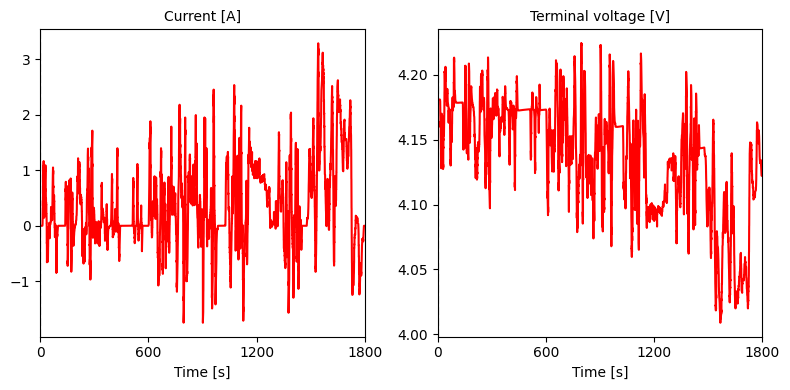

In [59]:
model = pybamm.lithium_ion.SPMe({"operating mode": "power"})
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve(t_eval)
sim.plot(["Current [A]", "Terminal voltage [V]"])

Now, we can set the initial SOC for the drive-cycle by passing it via keyword arguments,

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…

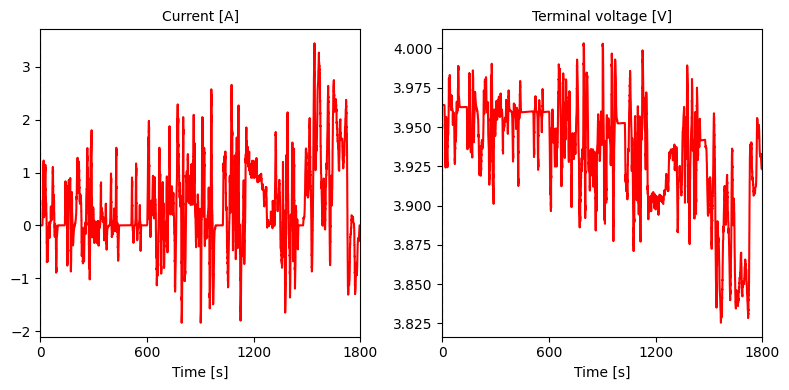

In [60]:
sim.solve(t_eval,initial_soc=0.717)
sim.plot(["Current [A]", "Terminal voltage [V]"])

Reusing the model comparison from the previous notebook, we can create a list for comparing models on the WLTP drive-cycle as:

In [61]:
models = [
    pybamm.lithium_ion.SPM({"operating mode": "power"}),
    pybamm.lithium_ion.SPMe({"operating mode": "power"}),
    # pybamm.lithium_ion.DFN({"operating mode": "power"}),
]

Note that we update the model definition for the power operation mode. Next, we loop through the formed list and append the solutions to the `sim` list.

In [ ]:
sims = []
for model in models:
    sim = pybamm.Simulation(model, parameter_values=parameter_values)
    sim.solve(t_eval)
    sims.append(sim)

Plotting the comparison as,

In [ ]:
pybamm.dynamic_plot(sims, time_unit="seconds")

# Accessing and saving simulation outputs

We can now access the solved variables directly to visualise or create our own plots. We first extract the solution object:

In [ ]:
solution = sims[0].solution

and now we can create a post-processed variable,

In [ ]:
t = solution["Time [s]"]
V = solution["Terminal voltage [V]"]

One option is to visualise the data set returned by the solver directly

In [ ]:
V.entries

which correspond to the data at the times

In [ ]:
t.entries

In addition, post-processed variables can be called at any time (by interpolation)

In [ ]:
V([200, 400, 780, 1236])  # times in seconds

## Saving the simulation and output data

In some cases simulations might take a long time to run so it is advisable to save in your computer so it can be analysed later without re-running the simulation. You can save the whole simulation doing:

In [ ]:
sims[1].save("SPMe.pkl")

If you now check the root directory of your notebooks you will notice that a new file called `"SPMe.pkl"` has appeared. We can load the stored simulation doing

In [ ]:
sim2 = pybamm.load("SPMe.pkl")

which allows the same manipulation as the original simulation would allow

In [ ]:
sim2.plot()

Alternatively, we can just save the solution of the simulation in a similar way

In [ ]:
sol = sim.solution
sol.save("SPMe_sol.pkl")

and load it in a similar way too

In [ ]:
sol2 = pybamm.load("SPMe_sol.pkl")
pybamm.dynamic_plot(sol2)

Another option is to just save the data for some variables

In [ ]:
sol.save_data("sol_data.pkl", ["Current [A]", "Terminal voltage [V]"])

or save in csv or mat format

In [ ]:
sol.save_data("sol_data.csv", ["Current [A]", "Terminal voltage [V]"], to_format="csv")
# matlab needs names without spaces
sol.save_data("sol_data.mat", ["Current [A]", "Terminal voltage [V]"], to_format="matlab",
              short_names={"Current [A]": "I", "Terminal voltage [V]": "V"})

If you are running on your local, removing the generated files can be completed through the below code block.

In [ ]:
import os
os.remove("SPMe.pkl")
os.remove("SPMe_sol.pkl")
os.remove("sol_data.pkl")
os.remove("sol_data.csv")
os.remove("sol_data.mat")

## References

The relevant papers for this notebook are:

In [ ]:
pybamm.print_citations()